
# **Importation des bibliothèques nécessaire **







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Importing the necessary modules
from sklearn.impute import SimpleImputer # Import SimpleImputer
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, accuracy_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



# **1. Exploration des Données**


**1.1 Chargement des Données**

In [ ]:
# Chargement du dataset
df = pd.read_csv("dataset_02052023.csv")
print(f"Dimensions : {df.shape}")
df.head()

Dimensions : (7409, 24)


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,False,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.390000e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,False,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,False,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,False,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,False,False


**1.2 Analyse Statistique**

In [ ]:
# Statistiques descriptives
df.describe()



,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,0.000904,41.891094,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,0.129141,3.680003,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,-0.474556,32.000000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,-0.094875,39.500000,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,0.014496,44.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,0.077995,44.500000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,0.392547,44.937500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000


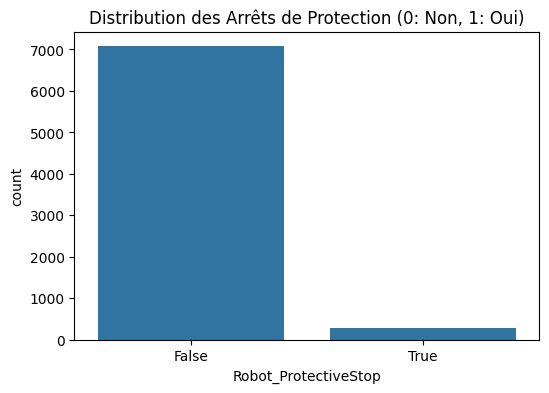

Ratio de classes :
Robot_ProtectiveStop
False    7077
True      278
Name: count, dtype: int64

Pourcentage de classe 1 : 3.75%


<ipython-input-6-737fc9f0a420>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Pourcentage de classe 1 : {class_counts[1]/len(df)*100:.2f}%")


In [ ]:
# Distribution de la target "ProtectiveStop"
plt.figure(figsize=(6, 4))
sns.countplot(x="Robot_ProtectiveStop", data=df)
plt.title("Distribution des Arrêts de Protection (0: Non, 1: Oui)")
plt.show()
class_counts = df["Robot_ProtectiveStop"].value_counts()
print(f"Ratio de classes :\n{class_counts}\n")
print(f"Pourcentage de classe 1 : {class_counts[1]/len(df)*100:.2f}%")

In [ ]:



# 2. Nettoyage des NaN dans la target
print(f"NaN avant suppression : {df['Robot_ProtectiveStop'].isna().sum()}")
df = df.dropna(subset=['Robot_ProtectiveStop'])  # Suppression des lignes avec NaN dans la target
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].astype(int)  # Conversion en int

# 3. Vérification du déséquilibre
target_counts = df['Robot_ProtectiveStop'].value_counts()
print(f"\nDistribution après nettoyage :\n{target_counts}\n")



NaN avant suppression : 54

Distribution après nettoyage :
Robot_ProtectiveStop
0    7077
1     278
Name: count, dtype: int64



<ipython-input-7-6c63ba0053c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].astype(int)  # Conversion en int


In [ ]:
# 4. Séparation features/target (en excluant les colonnes non-numériques)
excluded_cols = ['Robot_ProtectiveStop', 'Timestamp', 'Num']
X = df.drop(columns=excluded_cols)
y = df['Robot_ProtectiveStop']

# 5. SMOTETomek avec vérification des types
try:
    smt = SMOTETomek(sampling_strategy=0.5, random_state=42)
    X_res, y_res = smt.fit_resample(X, y)
    print(f"\nDistribution après SMOTETomek :\n{y_res.value_counts()}")

except ValueError as e:
    print(f"\nErreur lors du rééchantillonnage : {e}")
    print("Vérification des types :")
    print(f"Type de X : {type(X)}")
    print(f"Type de y : {type(y)}")
    print(f"Types dans X :\n{X.dtypes}")


Distribution après SMOTETomek :
Robot_ProtectiveStop
0    7059
1    3520
Name: count, dtype: int64


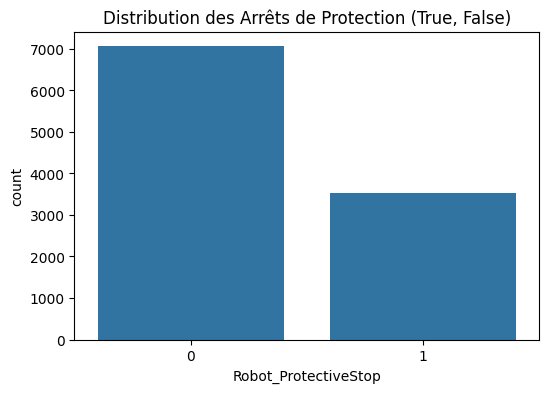

Ratio de classes :
Robot_ProtectiveStop
0    7059
1    3520
Name: count, dtype: int64

Pourcentage de classe 1 : 33.27%


In [ ]:
# Distribution de la target "ProtectiveStop" après SMOTETomek
plt.figure(figsize=(6, 4))
# Create a DataFrame with y_res for plotting
resampled_df = pd.DataFrame({'Robot_ProtectiveStop': y_res})
sns.countplot(x="Robot_ProtectiveStop", data=resampled_df) # Use 'x' and the new DataFrame
plt.title("Distribution des Arrêts de Protection (True, False)")
plt.show()

# You can also use y_res.value_counts() to print the class counts as before
class_counts = y_res.value_counts()
print(f"Ratio de classes :\n{class_counts}\n")
print(f"Pourcentage de classe 1 : {class_counts[1]/len(y_res)*100:.2f}%")

**1.3 Vérification des Données Manquantes**

# **2. Prétraitement des Données**


**2.1 Normalisation des Features**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import joblib
from google.colab import files

# === 8. Imputation des valeurs manquantes ===
imputer = SimpleImputer(strategy='median')  # Meilleure stratégie pour données industrielles
X_imputed = imputer.fit_transform(X_res)

# === 9. Normalisation (version améliorée) ===
# Choix du scaler selon la distribution des données
scaler = StandardScaler() if np.any(np.abs(X_imputed) > 100) else MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# === 10. Création des séquences temporelles ===
def create_sequences(X, y, time_steps=10, step=1):
    """
    Crée des séquences temporelles avec un pas réglable
    Args:
        X: données features
        y: target
        time_steps: taille de la fenêtre temporelle
        step: pas entre les séquences (1 pour maximum de données)
    """
    X_seq, y_seq = [], []
    for i in range(0, len(X) - time_steps, step):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_res)

# === 11. Vérification finale ===
print(f"\n=== FORMAT DES DONNÉES ===")
print(f"Shape des séquences X: {X_seq.shape}")  # (n_samples, time_steps, n_features)
print(f"Shape de y: {y_seq.shape}")
assert len(X_seq) == len(y_seq), "Les dimensions X et y ne correspondent pas"
assert X_seq.shape[1] == 10, "La dimension temporelle doit être 10"

# === 12. Sauvegarde des objets ===
joblib.dump(imputer, "imputer.pkl")
joblib.dump(scaler, "scaler.pkl")
np.save("X_seq.npy", X_seq)
np.save("y_seq.npy", y_seq)
print("\n✅ Fichiers sauvegardés avec succès.")

# === 13. Téléchargement automatique depuis Colab ===
files.download("imputer.pkl")
files.download("scaler.pkl")
files.download("X_seq.npy")
files.download("y_seq.npy")



=== FORMAT DES DONNÉES ===
Shape des séquences X: (10569, 10, 21)
Shape de y: (10569,)

✅ Fichiers sauvegardés avec succès.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2.2 Création des Séries Temporelle(Taille=10)**


# **3. Modélisation**
**3.1 Modèle LSTM**

Valeurs uniques de y_train : [0 1]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9050 - loss: 1.1461 - val_accuracy: 0.9631 - val_loss: 0.1921 - learning_rate: 0.0010
Epoch 2/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9606 - loss: 0.1890 - val_accuracy: 0.9664 - val_loss: 0.1602 - learning_rate: 0.0010
Epoch 3/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9668 - loss: 0.1622 - val_accuracy: 0.9607 - val_loss: 0.1553 - learning_rate: 0.0010
Epoch 4/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9685 - loss: 0.1522 - val_accuracy: 0.9626 - val_loss: 0.1468 - learning_rate: 0.0010
Epoch 5/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9690 - loss: 0.1393 - val_accuracy: 0.9603 - val_loss: 0.1435 - learning_rate: 0.0010
Epoch 6/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9647 - loss: 0.1447 - val_accuracy: 0.9683 - val_loss: 0.1295 - learning_rate: 0.0010
Epoch 7/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9704 - loss: 0.1311

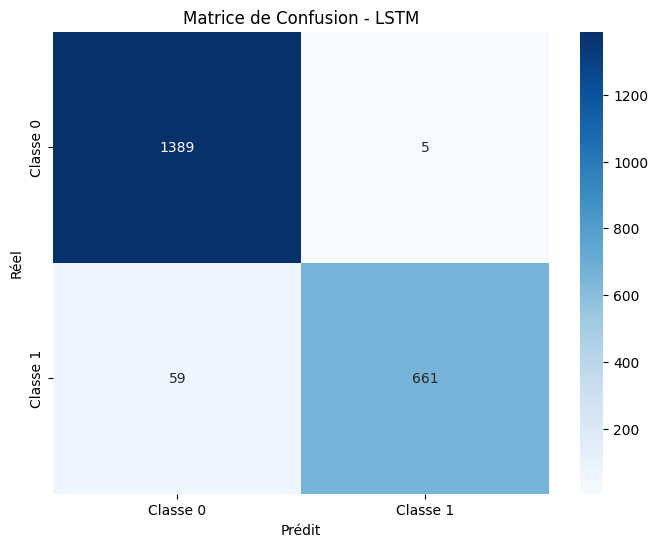

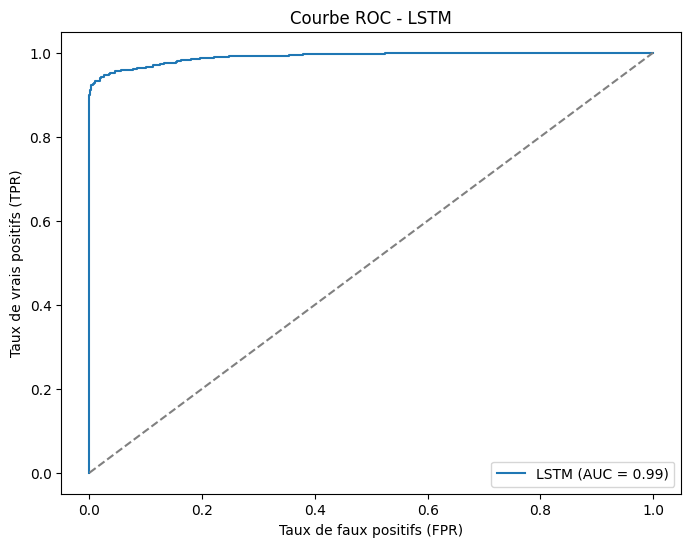

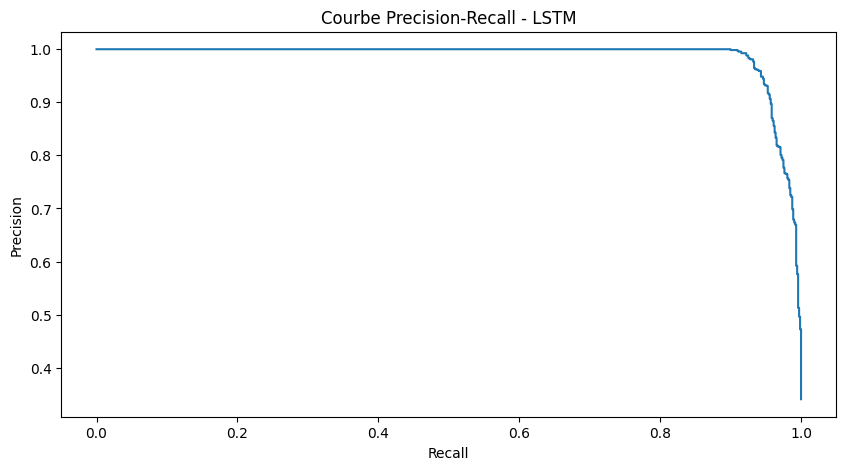

In [ ]:


# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Vérification des NaN/Inf
assert not np.isnan(X_train).any() and not np.isinf(X_train).any()
assert not np.isnan(y_train).any() and not np.isinf(y_train).any()

print("Valeurs uniques de y_train :", np.unique(y_train))

# Architecture du modèle
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
         kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    LSTM(64, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)
]

# Entraînement
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=callbacks)

# Prédictions
y_probs = model.predict(X_test).ravel()
y_pred = (y_probs >= 0.5).astype(int)

# === ÉVALUATION COMME POUR SVM/RF ===

# Rapport de classification
print("=== LSTM ===\n", classification_report(y_test, y_pred))

# Exactitude et F1
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Exactitude LSTM: {accuracy:.2f}")
print(f"F1-Score LSTM: {f1:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion - LSTM")
plt.ylabel('Réel')
plt.xlabel('Prédit')
plt.show()

# Courbe ROC
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"LSTM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title("Courbe ROC - LSTM")
plt.legend(loc="lower right")
plt.show()

# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(10,5))
plt.plot(recall, precision)
plt.title('Courbe Precision-Recall - LSTM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Sauvegarde du modèle
model.save("lstm_model.keras")


**3.2 Modèles de Comparaison (RandomForest, SVM)**

In [ ]:
# Aplatir les séquences pour SVM / RandomForest
X_seq_flat = X_seq.reshape(X_seq.shape[0], -1)

# Split + SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_seq_flat, y_seq, test_size=0.2, random_state=42, stratify=y_seq)
print("Distribution initiale :", np.bincount(y_train))
# Import SMOTE
from imblearn.over_sampling import SMOTE # Importing SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Distribution initiale : [5639 2816]


3.2.1 Entraînement & Évaluation RandomForest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== RandomForest ===
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1410
           1       0.97      0.93      0.95       704

    accuracy                           0.97      2114
   macro avg       0.97      0.96      0.96      2114
weighted avg       0.97      0.97      0.97      2114

Exactitude: 0.97
F1-score: 0.95


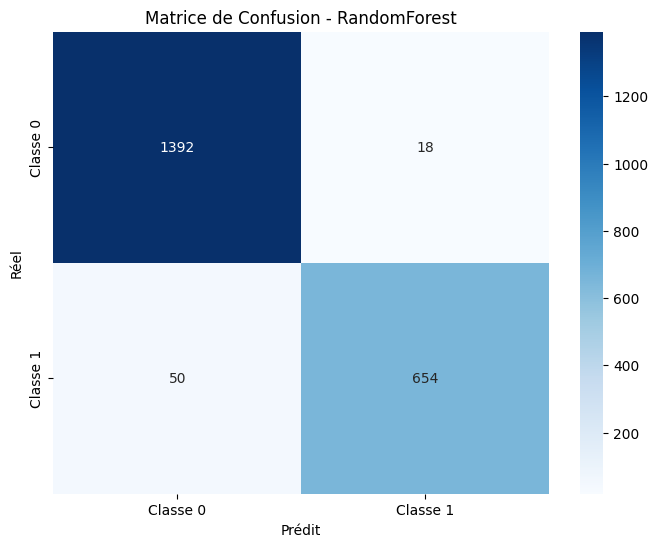

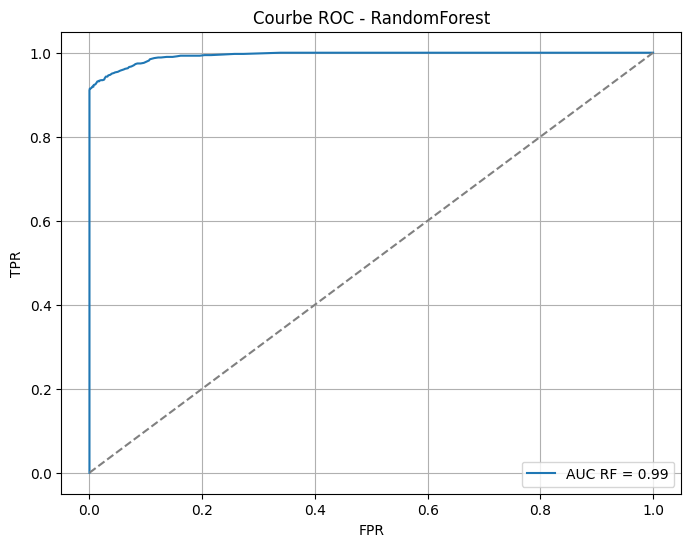

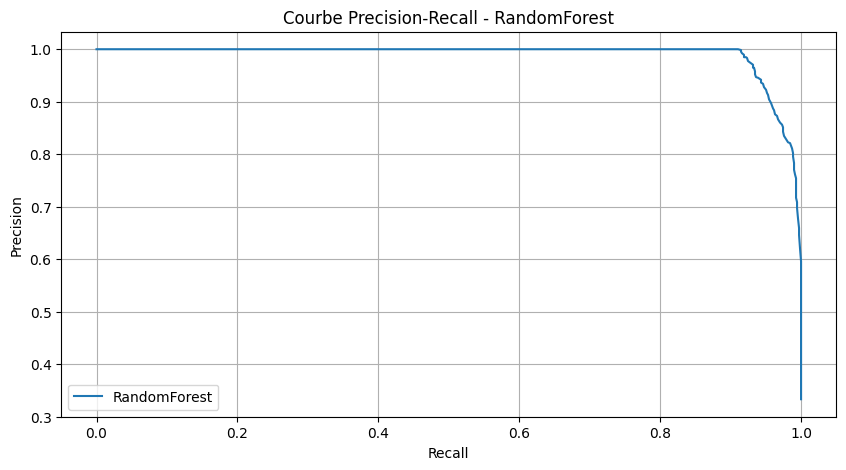

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import joblib
from google.colab import files

# Reshape X_test before prediction
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Modèle RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 💾 Sauvegarde du modèle entraîné
joblib.dump(rf, "rf_model.pkl")

# 📥 Téléchargement automatique depuis Colab
files.download("rf_model.pkl")

# Prédictions
rf_pred = rf.predict(X_test_flat)

print("=== RandomForest ===\n", classification_report(y_test, rf_pred))
print(f"Exactitude: {accuracy_score(y_test, rf_pred):.2f}")
print(f"F1-score: {f1_score(y_test, rf_pred):.2f}")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion - RandomForest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# ROC
rf_proba = rf.predict_proba(X_test_flat)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
roc_auc_rf = roc_auc_score(y_test, rf_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"AUC RF = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - RandomForest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

# Courbe Precision-Recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_proba)
plt.figure(figsize=(10,5))
plt.plot(recall_rf, precision_rf, label="RandomForest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision-Recall - RandomForest")
plt.grid()
plt.legend()
plt.show()


3.2.2 Entraînement & Évaluation SVM

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== SVM ===
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1410
           1       0.97      0.93      0.95       704

    accuracy                           0.97      2114
   macro avg       0.97      0.96      0.96      2114
weighted avg       0.97      0.97      0.97      2114

Exactitude: 0.97
F1-score: 0.95


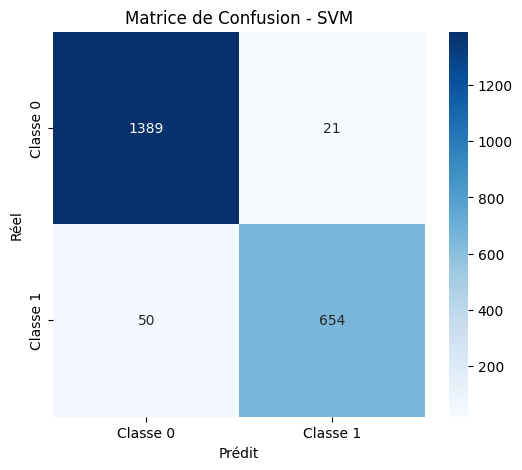

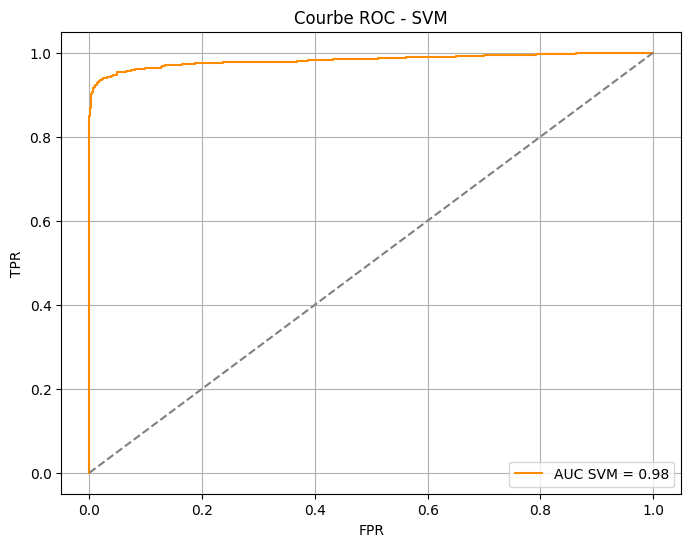

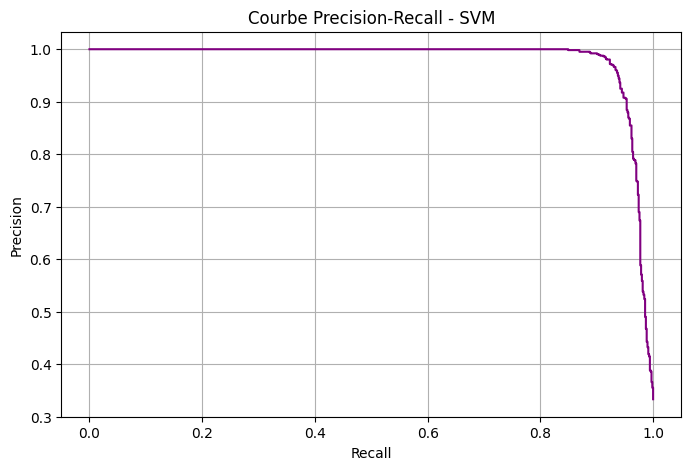

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import joblib
from google.colab import files

# Aplatir les séquences pour un modèle classique
X_seq_flat = X_seq.reshape(X_seq.shape[0], -1)

# Split train/test sur les données aplaties
X_train_flat, X_test_flat, y_train, y_test = train_test_split(X_seq_flat, y_seq, test_size=0.2, random_state=42, stratify=y_seq)

# SMOTE pour gérer le déséquilibre
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

# ============== SVM ====================
svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

#Sauvegarde locale du modèle
joblib.dump(svm, "svm_model.pkl")

#Téléchargement automatique du modèle
files.download("svm_model.pkl")

# Prédictions
svm_pred = svm.predict(X_test_flat)
svm_proba = svm.predict_proba(X_test_flat)[:, 1]

# Rapport de classification
print("=== SVM ===\n", classification_report(y_test, svm_pred))
print(f"Exactitude: {accuracy_score(y_test, svm_pred):.2f}")
print(f"F1-score: {f1_score(y_test, svm_pred):.2f}")

# Matrice de confusion
cm_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Courbe ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
roc_auc_svm = roc_auc_score(y_test, svm_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"AUC SVM = {roc_auc_svm:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Courbe ROC - SVM")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()
plt.show()

# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, svm_proba)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='purple')
plt.title("Courbe Precision-Recall - SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()


In [ ]:


# Calculer les métriques pour chaque modèle
models = ['LSTM', 'RandomForest', 'SVM']
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, svm_pred)]
f1 = [f1_score(y_test, y_pred), f1_score(y_test, rf_pred), f1_score(y_test, svm_pred)]
roc_auc = [roc_auc_score(y_test, y_probs), roc_auc_score(y_test, rf_proba), roc_auc_score(y_test, svm_proba)]

# Créer le DataFrame
results_df = pd.DataFrame({'Modèle': models, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': roc_auc})

# Afficher le tableau
display(results_df)

,Modèle,Accuracy,F1-Score,AUC
0,LSTM,0.564806,0.333333,0.512687
1,RandomForest,0.967833,0.950581,0.993823
2,SVM,0.966414,0.948513,0.982388


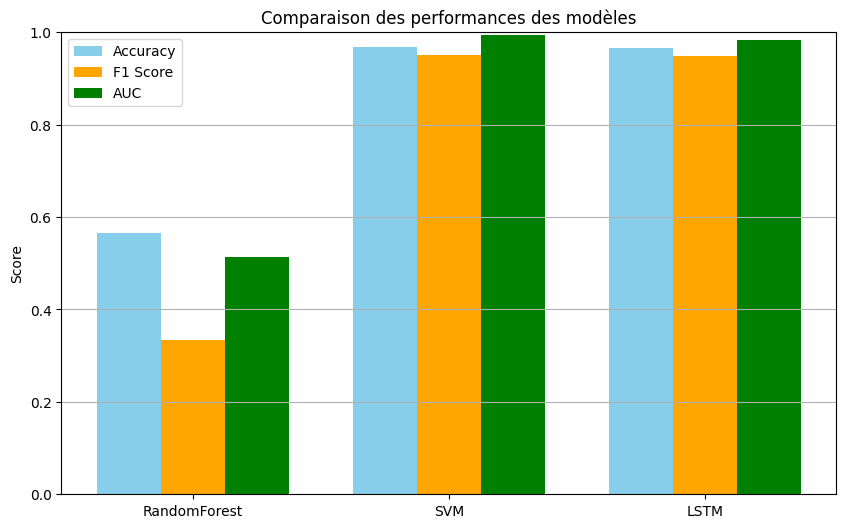

In [ ]:


# Assuming accuracy_rf, accuracy_svm, f1_rf, f1_svm, auc_rf, auc_svm are calculated in previous cells

# Get LSTM metrics from previous calculations
accuracy_lstm = accuracy  # Assuming 'accuracy' is the variable used for LSTM accuracy
f1_lstm = f1  # Assuming 'f1' is the variable used for LSTM F1-score
auc_lstm = roc_auc  # Assuming 'roc_auc' is the variable used for LSTM AUC

# Noms des modèles
model_names = ["RandomForest", "SVM", "LSTM"]

# Données de performance
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, svm_pred)]
f1 = [f1_score(y_test, y_pred), f1_score(y_test, rf_pred), f1_score(y_test, svm_pred)]
roc_auc = [roc_auc_score(y_test, y_probs), roc_auc_score(y_test, rf_proba), roc_auc_score(y_test, svm_proba)]

x = np.arange(len(model_names))
width = 0.25

# Création du graphique
plt.figure(figsize=(10,6))
plt.bar(x - width, accuracy, width, label='Accuracy', color='skyblue') # Changed 'accuracies' to 'accuracy'
plt.bar(x, f1, width, label='F1 Score', color='orange') # Changed 'f1_scores' to 'f1'
plt.bar(x + width, roc_auc, width, label='AUC', color='green') # Changed 'auc_scores' to 'roc_auc'

# Ajouts esthétiques
plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparaison des performances des modèles")
plt.legend()
plt.grid(axis='y')
plt.show()